In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
import os
for dirname, _, filenames in os.walk('./inputs'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./inputs\Data_User_Modeling_Dataset - Information.csv
./inputs\Data_User_Modeling_Dataset - Test_Data.csv
./inputs\Data_User_Modeling_Dataset - Training_Data.csv


In [3]:
info_df = pd.read_csv('./inputs/Data_User_Modeling_Dataset - Information.csv')
test_df = pd.read_csv('./inputs/Data_User_Modeling_Dataset - Test_Data.csv')
train_df = pd.read_csv('./inputs/Data_User_Modeling_Dataset - Training_Data.csv')

In [4]:
info_df.head()

Data Set Characteristics: Multivariate  Unnamed: 1  \
0               Number of Instances: 403         NaN   
1                        Area: Education         NaN   
2        Attribute Characteristics: Real         NaN   
3                Number of Attributes: 5         NaN   
4       Associated Tasks: Classification         NaN   

                              Attribute Information:  
0  STG (The degree of study time for goal object ...  
1  SCG (The degree of repetition number of user f...  
2  STR (The degree of study time of user for rela...  
3  LPR (The exam performance of user for related ...  
4  PEG (The exam performance of user for goal obj...

In [5]:
list(info_df['Attribute Information:']) 

['STG (The degree of study time for goal object materails),',
 'SCG (The degree of repetition number of user for goal object materails)',
 'STR (The degree of study time of user for related objects with goal object)',
 'LPR (The exam performance of user for related objects with goal object)',
 'PEG (The exam performance of user for goal objects)',
 'UNS (The knowledge level of user)',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [6]:
train_df.head()

STG   SCG   STR   LPR   PEG       UNS  Unnamed: 6  Unnamed: 7  \
0  0.00  0.00  0.00  0.00  0.00  very_low         NaN         NaN   
1  0.08  0.08  0.10  0.24  0.90      High         NaN         NaN   
2  0.06  0.06  0.05  0.25  0.33       Low         NaN         NaN   
3  0.10  0.10  0.15  0.65  0.30    Middle         NaN         NaN   
4  0.08  0.08  0.08  0.98  0.24       Low         NaN         NaN   

                              Attribute Information:  
0  STG (The degree of study time for goal object ...  
1  SCG (The degree of repetition number of user f...  
2  STR (The degree of study time of user for rela...  
3  LPR (The exam performance of user for related ...  
4  PEG (The exam performance of user for goal obj...

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STG                     258 non-null    float64
 1   SCG                     258 non-null    float64
 2   STR                     258 non-null    float64
 3   LPR                     258 non-null    float64
 4   PEG                     258 non-null    float64
 5    UNS                    258 non-null    object 
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Attribute Information:  6 non-null      object 
dtypes: float64(7), object(2)
memory usage: 18.3+ KB


In [8]:
train_df[' UNS']

0      very_low
1          High
2           Low
3        Middle
4           Low
         ...   
253        High
254      Middle
255        High
256      Middle
257        High
Name:  UNS, Length: 258, dtype: object

In [9]:
test_df.head()

STG   SCG   STR   LPR   PEG       UNS  Unnamed: 6  Unnamed: 7  \
0  0.00  0.10  0.50  0.26  0.05  Very Low         NaN         NaN   
1  0.05  0.05  0.55  0.60  0.14       Low         NaN         NaN   
2  0.08  0.18  0.63  0.60  0.85      High         NaN         NaN   
3  0.20  0.20  0.68  0.67  0.85      High         NaN         NaN   
4  0.22  0.22  0.90  0.30  0.90      High         NaN         NaN   

                              Attribute Information:  
0  STG (The degree of study time for goal object ...  
1  SCG (The degree of repetition number of user f...  
2  STR (The degree of study time of user for rela...  
3  LPR (The exam performance of user for related ...  
4  PEG (The exam performance of user for goal obj...

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STG                     145 non-null    float64
 1   SCG                     145 non-null    float64
 2   STR                     145 non-null    float64
 3   LPR                     145 non-null    float64
 4   PEG                     145 non-null    float64
 5    UNS                    145 non-null    object 
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Attribute Information:  6 non-null      object 
dtypes: float64(7), object(2)
memory usage: 10.3+ KB


In [11]:
train_df.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS', 'Unnamed: 6', 'Unnamed: 7',
       'Attribute Information:'],
      dtype='object')

In [12]:
train_df.drop(['Unnamed: 6', 'Unnamed: 7','Attribute Information:'], axis=1, inplace=True)

In [13]:
train_df.rename(columns = {' UNS':'Knowledge Level'}, inplace = True)

In [14]:
train_df.head()

STG   SCG   STR   LPR   PEG Knowledge Level
0  0.00  0.00  0.00  0.00  0.00        very_low
1  0.08  0.08  0.10  0.24  0.90            High
2  0.06  0.06  0.05  0.25  0.33             Low
3  0.10  0.10  0.15  0.65  0.30          Middle
4  0.08  0.08  0.08  0.98  0.24             Low

In [15]:
def fix_data(temp_df):
    temp_df.drop(['Unnamed: 6', 'Unnamed: 7','Attribute Information:'], axis=1, inplace=True)
    temp_df.rename(columns = {' UNS':'Knowledge Level'}, inplace = True)
    return temp_df

In [16]:
test_df.head()

STG   SCG   STR   LPR   PEG       UNS  Unnamed: 6  Unnamed: 7  \
0  0.00  0.10  0.50  0.26  0.05  Very Low         NaN         NaN   
1  0.05  0.05  0.55  0.60  0.14       Low         NaN         NaN   
2  0.08  0.18  0.63  0.60  0.85      High         NaN         NaN   
3  0.20  0.20  0.68  0.67  0.85      High         NaN         NaN   
4  0.22  0.22  0.90  0.30  0.90      High         NaN         NaN   

                              Attribute Information:  
0  STG (The degree of study time for goal object ...  
1  SCG (The degree of repetition number of user f...  
2  STR (The degree of study time of user for rela...  
3  LPR (The exam performance of user for related ...  
4  PEG (The exam performance of user for goal obj...

In [17]:
def clean_my_data(df):
    if df.isnull().values.any(): # isnull().values.any() returns a boolean value depending upon the presence of null value anywhere in data
        print(df.isnull()) # returns dataframe filled with boolean values for presence of null
        df = df.dropna()
    else: print('Your data do not contain any missing values.')
    return df

In [18]:
# train_df = fix_data(train_df)
train_df = clean_my_data(train_df)

Your data do not contain any missing values.


In [19]:
test_df = fix_data(test_df)
test_df = clean_my_data(test_df)

Your data do not contain any missing values.


In [20]:
import seaborn as sns

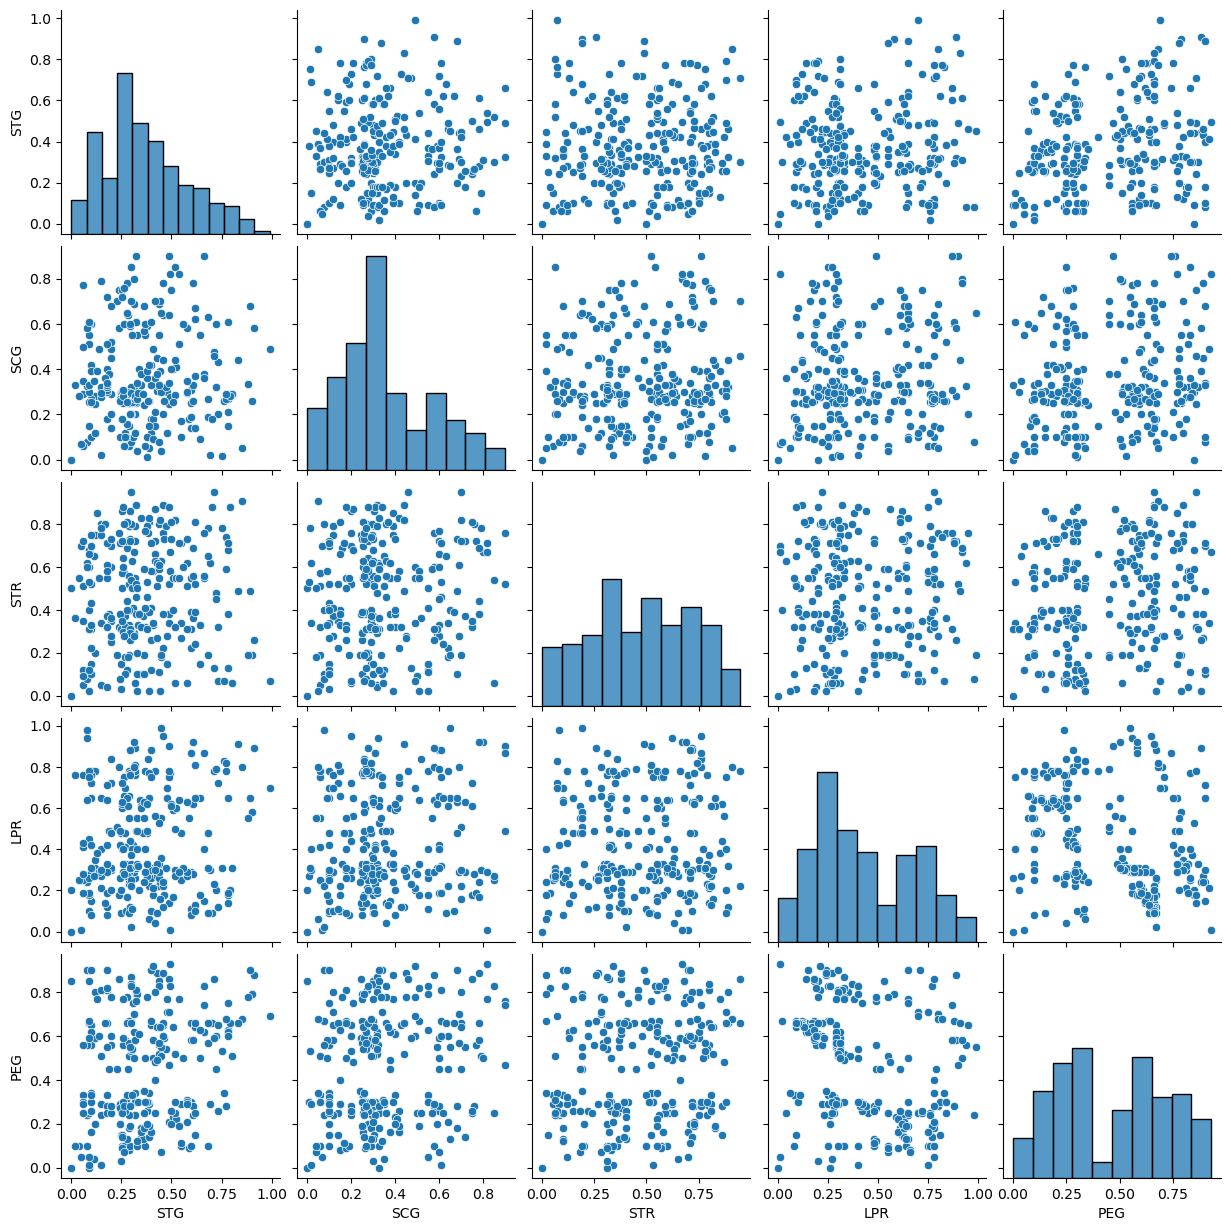

In [21]:
sns.pairplot(train_df[train_df.select_dtypes(include=[np.number]).columns])

<Axes: xlabel='Knowledge Level', ylabel='PEG'>

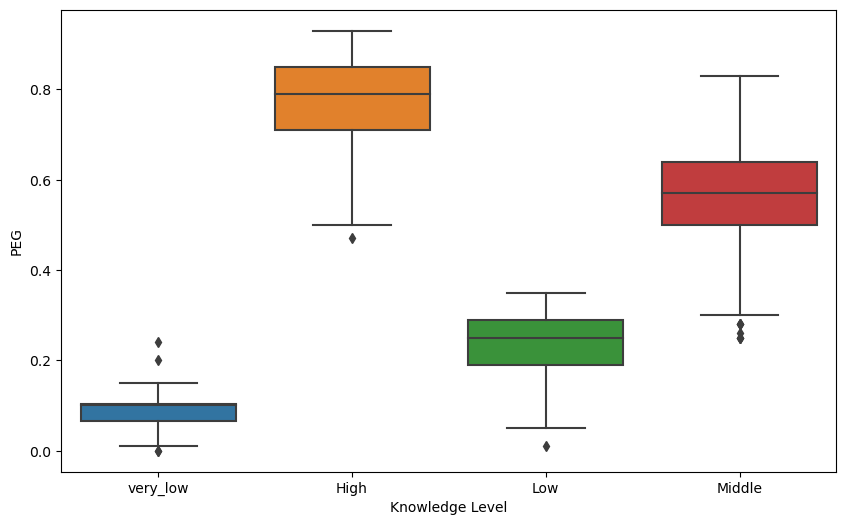

In [22]:
f,ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data = train_df, x='Knowledge Level', y='PEG', ax=ax)

In [23]:
train_df.drop(train_df[train_df['PEG'] < 0 ].index, axis=1, inplace=True)

array([[<Axes: title={'center': 'LPR'}, xlabel='[Knowledge Level]'>,
        <Axes: title={'center': 'PEG'}, xlabel='[Knowledge Level]'>,
        <Axes: title={'center': 'SCG'}, xlabel='[Knowledge Level]'>],
       [<Axes: title={'center': 'STG'}, xlabel='[Knowledge Level]'>,
        <Axes: title={'center': 'STR'}, xlabel='[Knowledge Level]'>,
        <Axes: >]], dtype=object)

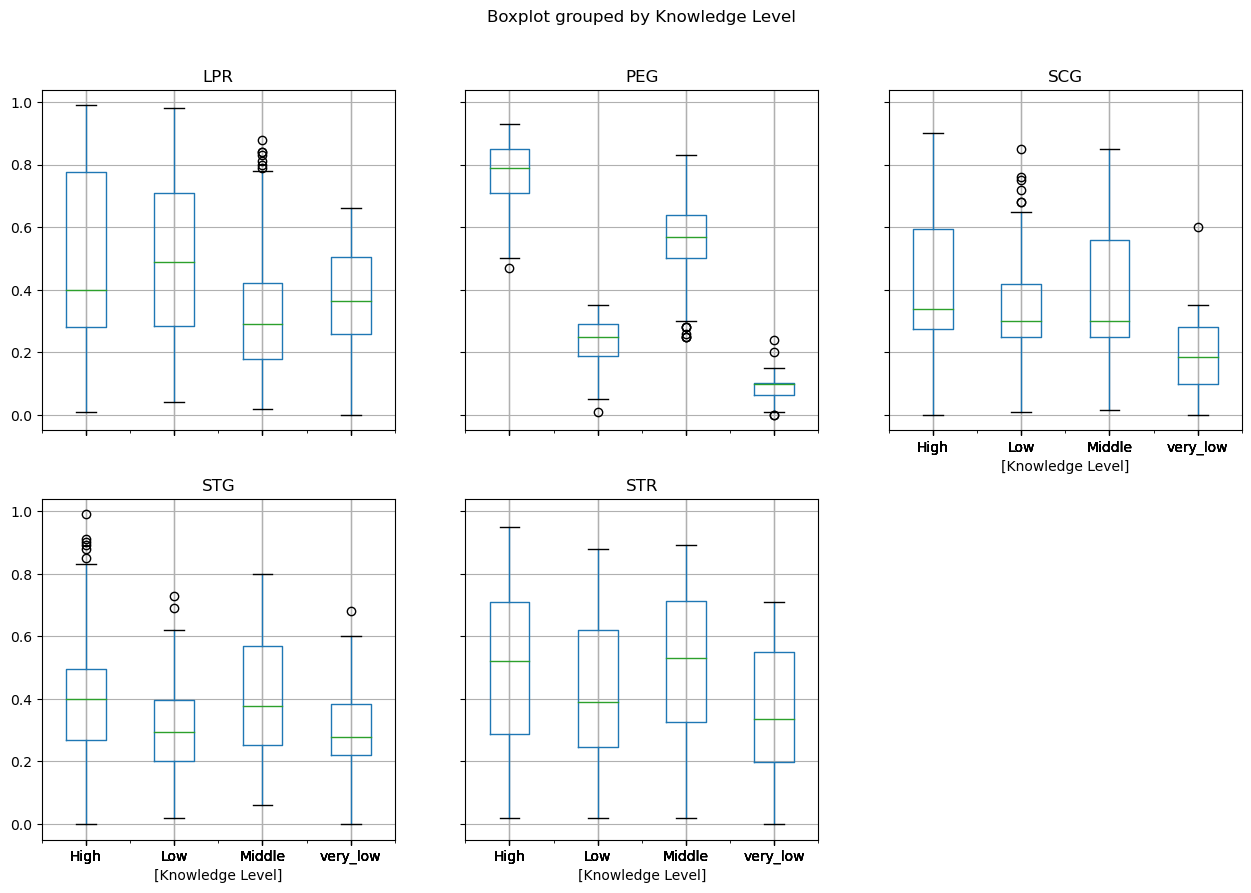

In [24]:
train_df.boxplot(layout=(2,3), by='Knowledge Level', figsize=[15,10])

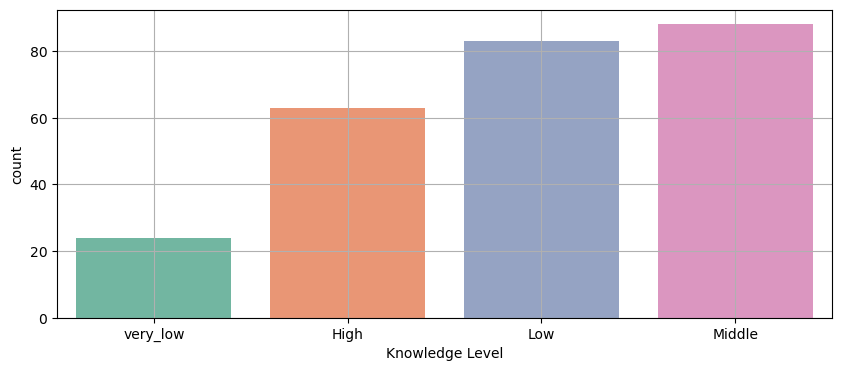

In [25]:
f,ax = plt.subplots(figsize=(10, 4))
sns.countplot(x = 'Knowledge Level', data = train_df, palette="Set2", ax=ax)
plt.grid(True)

In [26]:
train_df.describe()

STG         SCG         STR         LPR         PEG
count  258.000000  258.000000  258.000000  258.000000  258.000000
mean     0.371147    0.355674    0.468004    0.432713    0.458539
std      0.210271    0.211962    0.245940    0.248108    0.255211
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.240750    0.210000    0.291250    0.250000    0.250000
50%      0.327000    0.302500    0.490000    0.330000    0.500000
75%      0.495000    0.497500    0.690000    0.647500    0.660000
max      0.990000    0.900000    0.950000    0.990000    0.930000

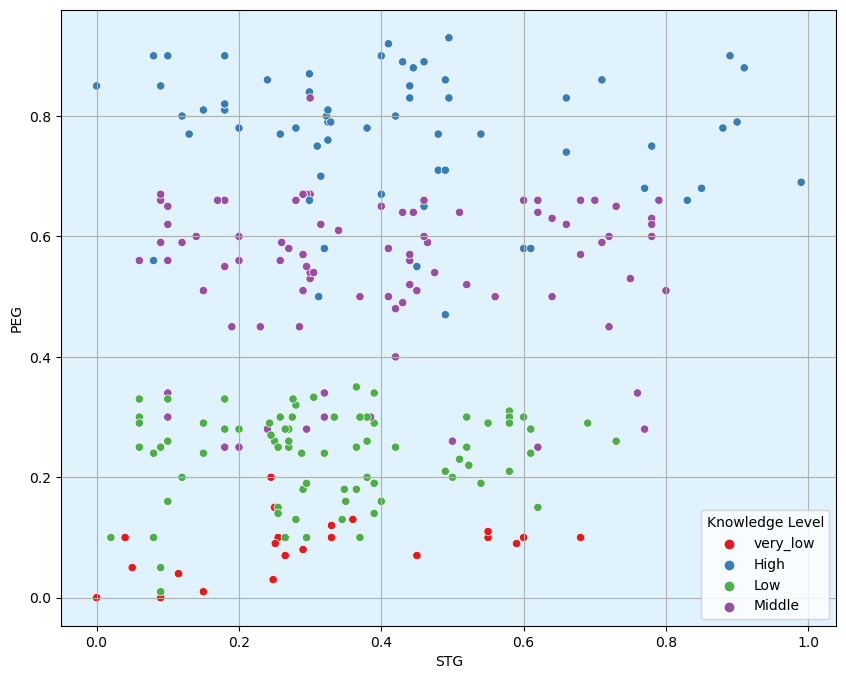

In [27]:
f,ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=train_df['STG'], y=train_df['PEG'], hue=train_df['Knowledge Level'], ax=ax, palette="Set1")
ax.set_facecolor('#e0f2fc')
plt.grid(True)

In [28]:
train_df['Knowledge Level'].unique()

array(['very_low', 'High', 'Low', 'Middle'], dtype=object)

In [29]:
Knowledge_levels = train_df['Knowledge Level'].unique()

In [30]:
df = train_df
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [31]:
df['Knowledge Level']= label_encoder.fit_transform(df['Knowledge Level']) 
df

STG   SCG   STR   LPR   PEG  Knowledge Level
0    0.00  0.00  0.00  0.00  0.00                3
1    0.08  0.08  0.10  0.24  0.90                0
2    0.06  0.06  0.05  0.25  0.33                1
3    0.10  0.10  0.15  0.65  0.30                2
4    0.08  0.08  0.08  0.98  0.24                1
..    ...   ...   ...   ...   ...              ...
253  0.61  0.78  0.69  0.92  0.58                0
254  0.78  0.61  0.71  0.19  0.60                2
255  0.54  0.82  0.71  0.29  0.77                0
256  0.50  0.75  0.81  0.61  0.26                2
257  0.66  0.90  0.76  0.87  0.74                0

[258 rows x 6 columns]

In [32]:
test_df['Knowledge Level'] = label_encoder.fit_transform(test_df['Knowledge Level'])

In [33]:
test_df.head()

STG   SCG   STR   LPR   PEG  Knowledge Level
0  0.00  0.10  0.50  0.26  0.05                3
1  0.05  0.05  0.55  0.60  0.14                1
2  0.08  0.18  0.63  0.60  0.85                0
3  0.20  0.20  0.68  0.67  0.85                0
4  0.22  0.22  0.90  0.30  0.90                0

In [34]:
hot_encoded=pd.get_dummies(df, columns=['Knowledge Level'])
hot_encoded

STG   SCG   STR   LPR   PEG  Knowledge Level_0  Knowledge Level_1  \
0    0.00  0.00  0.00  0.00  0.00                  0                  0   
1    0.08  0.08  0.10  0.24  0.90                  1                  0   
2    0.06  0.06  0.05  0.25  0.33                  0                  1   
3    0.10  0.10  0.15  0.65  0.30                  0                  0   
4    0.08  0.08  0.08  0.98  0.24                  0                  1   
..    ...   ...   ...   ...   ...                ...                ...   
253  0.61  0.78  0.69  0.92  0.58                  1                  0   
254  0.78  0.61  0.71  0.19  0.60                  0                  0   
255  0.54  0.82  0.71  0.29  0.77                  1                  0   
256  0.50  0.75  0.81  0.61  0.26                  0                  0   
257  0.66  0.90  0.76  0.87  0.74                  1                  0   

     Knowledge Level_2  Knowledge Level_3  
0                    0                  1  
1                    0                  0  
2                    0                  0  
3                    1                  0  
4                    0                  0  
..                 ...                ...  
253                  0                  0  
254                  1                  0  
255                  0                  0  
256                  1                  0  
257                  0                  0  

[258 rows x 9 columns]

In [35]:
df = pd.concat([df, test_df], axis =0) #using append to add two datasets.

In [36]:
X = df.drop(['Knowledge Level'],axis=1) # assigning X all the independent variable
y = df['Knowledge Level'] #assigning y the target variable

In [37]:
df.isna().sum()

STG                0
SCG                0
STR                0
LPR                0
PEG                0
Knowledge Level    0
dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [40]:
clf.score(X_test, y_test)


0.9629629629629629

In [41]:
label_encoder.inverse_transform(clf.predict([[0, 0.1, 0.5, 0, 0], [0, 0.1, 0.5, 0.8, 1]]))

C:\Users\yashs\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Very Low', 'High'], dtype=object)

In [42]:
import pickle
with open(b"svc.obj","wb") as MODEL_PATH:
    pickle.dump(clf,MODEL_PATH)

with open(b"label_encoder.obj","wb") as LABEL_ENCODER_PATH:
    pickle.dump(label_encoder,LABEL_ENCODER_PATH)